In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [69]:
df_stock = pd.read_csv('NFLX.csv')
df_stock


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [70]:
df_stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [71]:
df_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


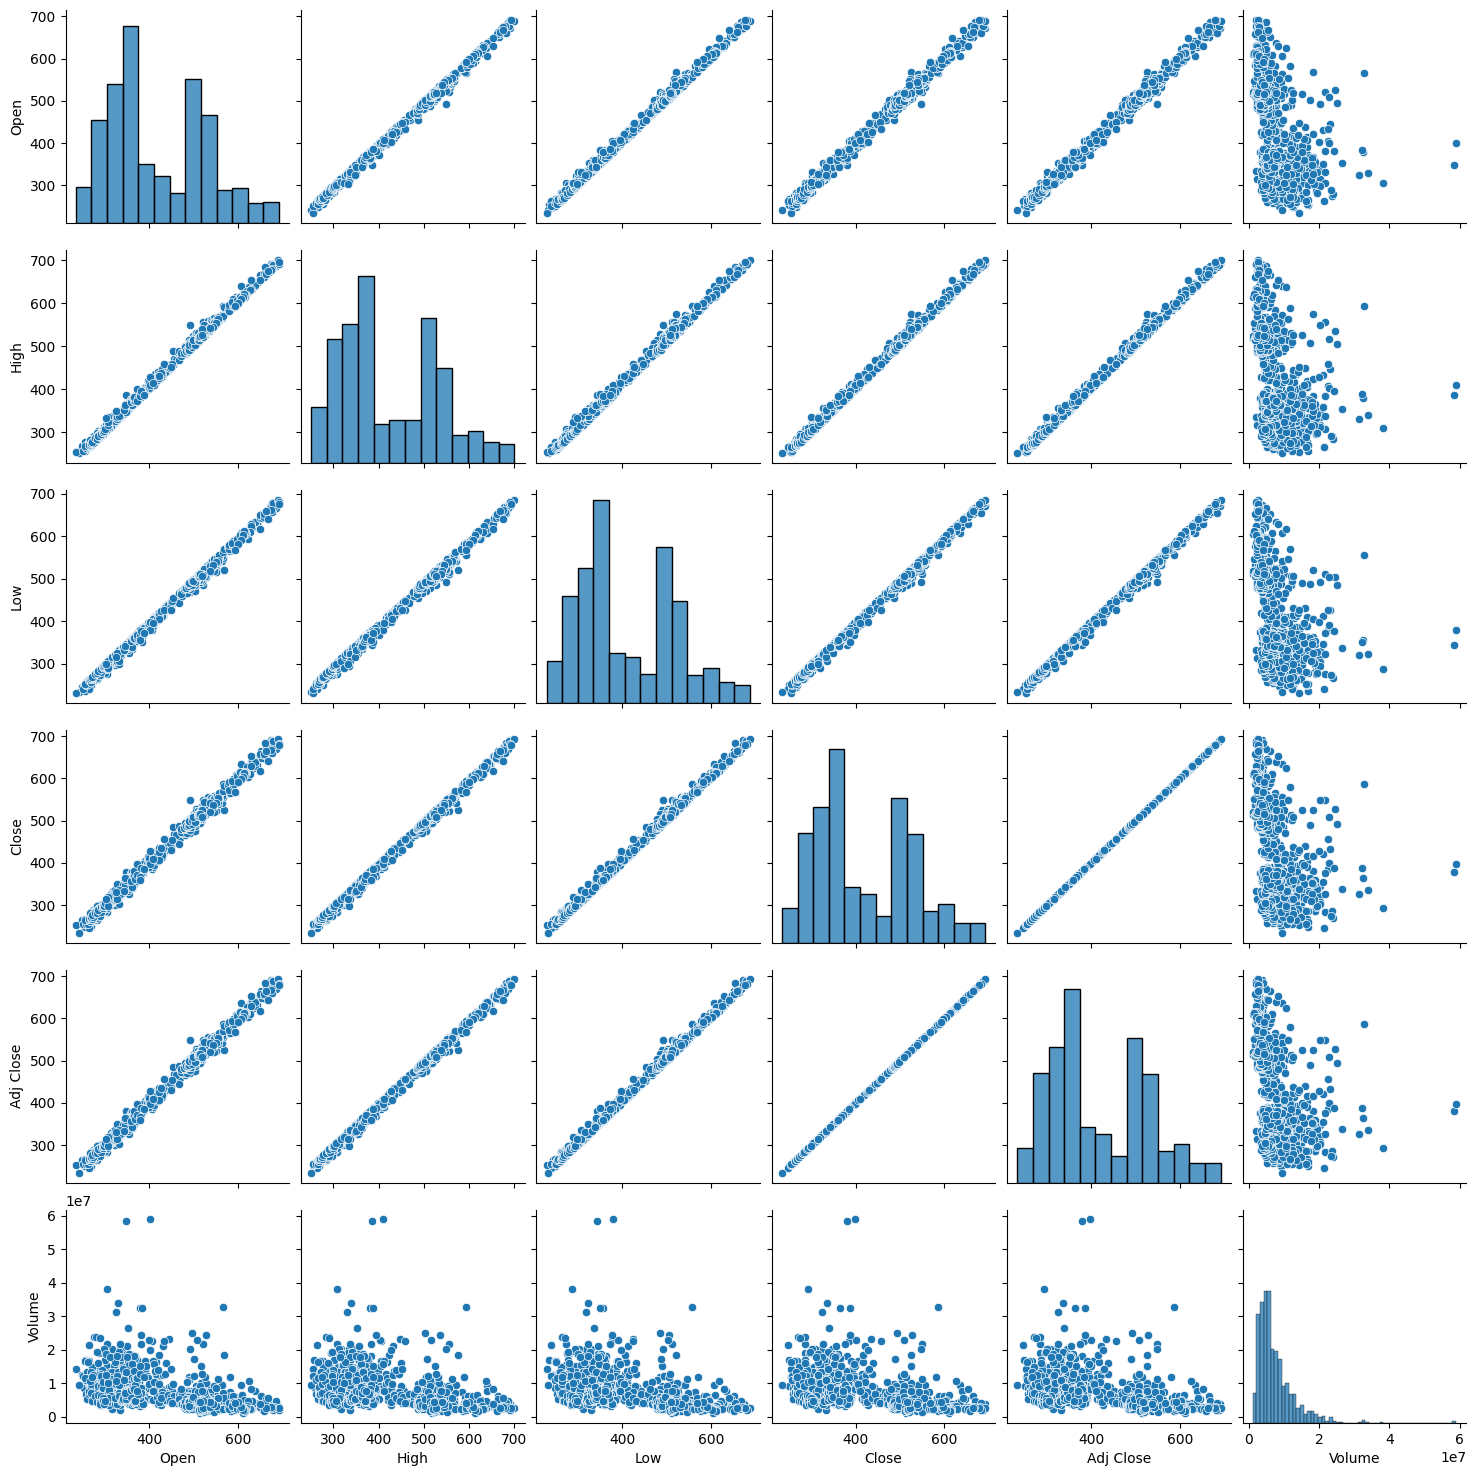

In [72]:
visual = sns.pairplot(df_stock)

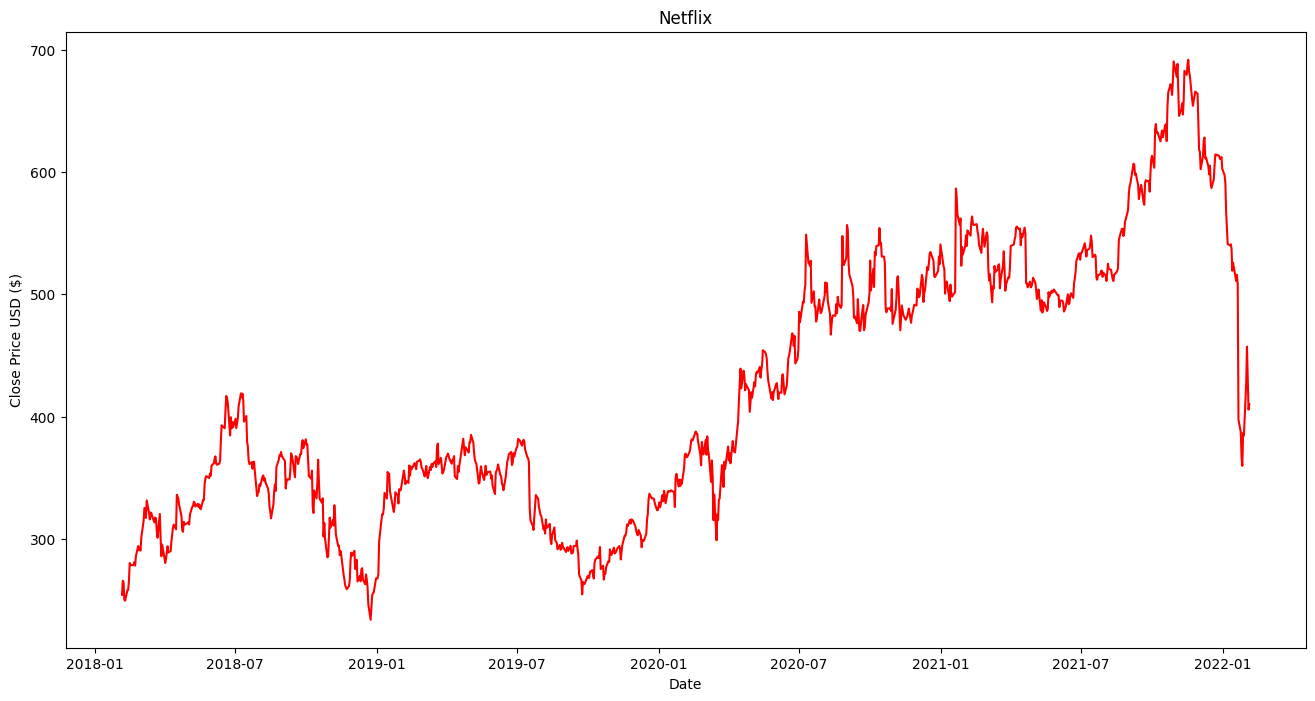

In [73]:
# data visualization x-axis: date, y-axis: close price
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(pd.to_datetime(df_stock['Date'],format='%Y-%m-%d'),df_stock['Close'],color='red')
plt.show()


In [74]:
data=pd.DataFrame({'Date': df_stock['Date'], 'Close': df_stock['Close']})
data=data.set_index('Date')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [75]:
x=df_stock[['Open','High','Low','Volume']]
y=df_stock['Close']


In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 42)


In [78]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [79]:
y_pred=lr.predict(x_test)
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result

,Actual,Predicted
628,509.640015,508.503210
631,494.730011,492.622129
741,500.859985,506.904498
514,380.070007,380.941828
365,315.100006,319.219895
...,...,...
780,518.020020,519.060313
334,355.730011,352.755201
210,275.329987,284.160124
350,370.019989,369.504603


Text(0.5, 1.0, 'Actual vs Predicted')

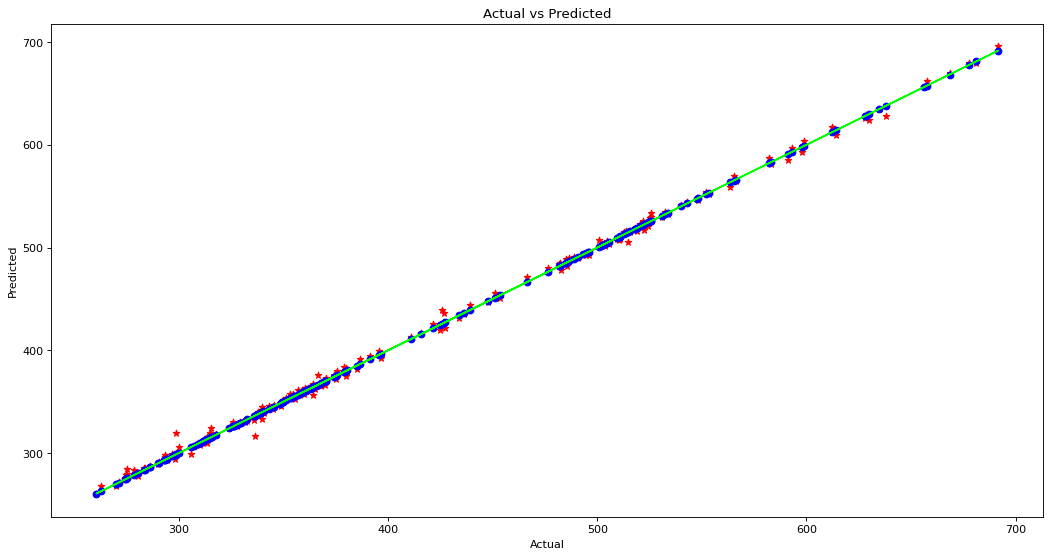

In [80]:
plt.figure(figsize=(16,8),dpi=80)
plt.scatter(y_test,y_pred,color='red',marker='*')
plt.scatter(y_test,y_test,color='blue')
plt.plot(y_test,y_test,color='lime')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


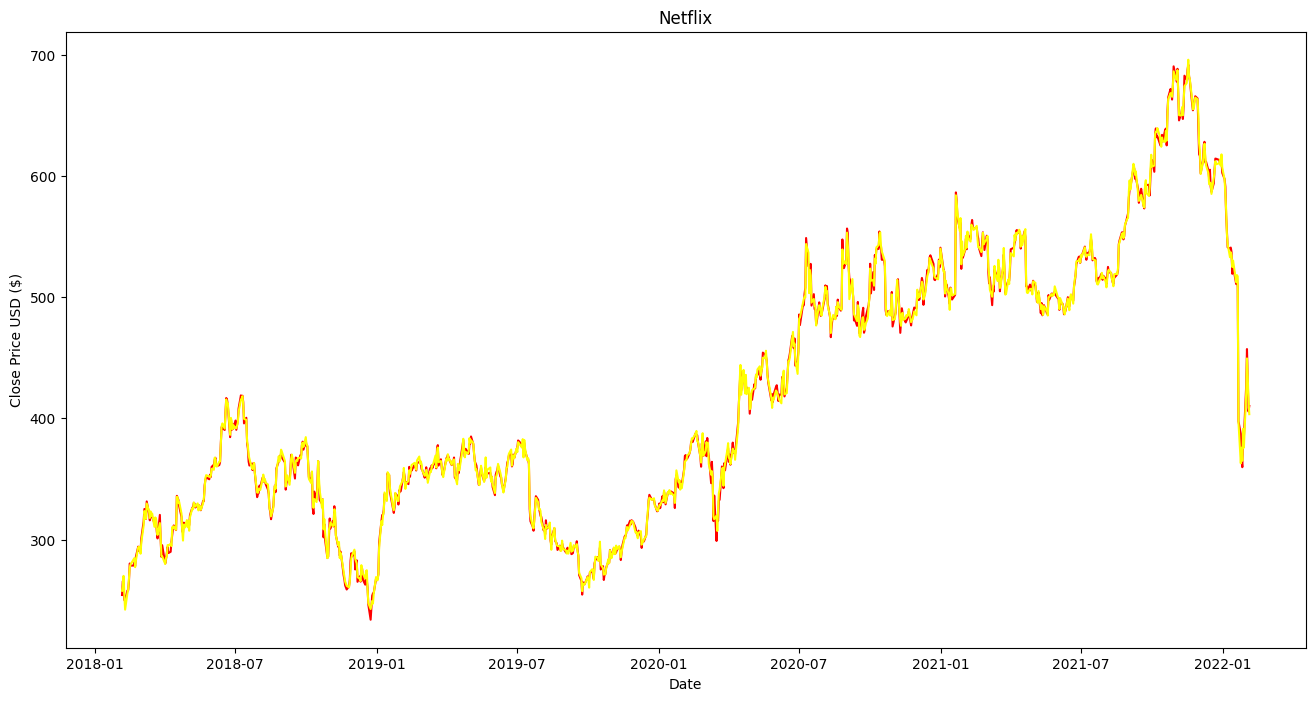

In [83]:
# data visualization x-axis: date, y-axis: close price
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(pd.to_datetime(df_stock['Date'],format='%Y-%m-%d'),df_stock['Close'],color='red')
plt.plot(pd.to_datetime(df_stock['Date'],format='%Y-%m-%d'),lr.predict(x),color='yellow',label='Predicted Price')
plt.show()
